<a href="https://colab.research.google.com/github/jjgallonc/Analitica/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de librerías, drive y base de datos

In [ ]:
#Librerías para Naive Bayes
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from functools import cmp_to_key

#Librerías para Árbol de Decisión
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

#Librerías para KMeans
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from os import EX_CANTCREAT

#Cargar Drive
from google.colab import drive
drive.mount('/content/drive')

#Cargar base de datos
nxl='/content/drive/MyDrive/Analitica de Negocios/Parcial1.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()

##Transformar variables categóricas
le=LabelEncoder()
XDB['Sex']=le.fit_transform(XDB['Sex'])

XD=np.array(XDB[['White','HS GPA','SAT','GPA','College Parent']])
YD=np.array(XDB['Grad'])

XDB.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sex,White,HS GPA,SAT,GPA,College Parent,Grad
0,0,1,4.14,1410,2.949,1,1
1,1,1,3.30,1260,2.789,1,1
2,0,0,4.30,950,2.851,0,1
3,1,1,4.29,1290,3.533,1,1
4,0,1,4.20,1350,3.301,1,1
5,0,0,3.86,1350,2.858,1,1
6,1,1,3.75,1180,3.252,1,1
7,0,0,3.32,1180,2.992,1,1
8,0,1,3.86,970,2.953,1,1
9,1,1,3.91,1490,3.260,1,1


# Modelo Naive Bayes

1. Tamaño de la base de datos

In [ ]:
td=len(XDB)
print('Tamaño de la base de datos: ',td)

Tamaño de la base de datos:  2000


2. Porcentaje de datos pertenecientes a cada una de las categorías de selección

In [ ]:
porcentaje_dy1=(YD[YD==1].shape[0]/YD.shape[0])*100
print('Porcentaje de personas que se gradúan:',porcentaje_dy1)
porcentaje_dy0=(YD[YD==0].shape[0]/YD.shape[0])*100
print('Porcentaje de personas que no se gradúan:',porcentaje_dy0)

Porcentaje de personas que se gradúan: 69.19999999999999
Porcentaje de personas que no se gradúan: 30.8


3. Creación del Modelo

In [ ]:
np.set_printoptions(suppress=True, precision=2)

mnb=GaussianNB()
mnb.fit(XD,YD)

ydp=mnb.predict(XD)
u=mnb.theta_
sigma=np.sqrt(mnb.var_)
li=u-sigma
ls=u+sigma
print('Media: ',u)
print('Desviación estándar: ',sigma)
print('Limite inferior: ',li)
print('Limite superior: ',ls)

Media:  [[   0.59    3.71 1234.85    2.43    0.7 ]
 [   0.72    3.91 1288.55    3.29    0.68]]
Desviación estándar:  [[  0.49   0.38 151.66   0.48   0.46]
 [  0.45   0.29 136.44   0.32   0.47]]
Limite inferior:  [[   0.09    3.33 1083.2     1.96    0.24]
 [   0.27    3.62 1152.11    2.97    0.21]]
Limite superior:  [[   1.08    4.09 1386.51    2.91    1.16]
 [   1.17    4.21 1424.99    3.6     1.15]]


4. Matriz de Confusión e Índices

In [ ]:
cm=confusion_matrix(YD,ydp)
print('Matriz de confusión: \n',cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN)
print('Exactitud: ',Exactitud)
Sensibilidad=VP/(VP+FN)
print('Sensibilidad: ',Sensibilidad)
Especificidad=VN/(VN+FP)
print('Especificidad: ',Especificidad)

Matriz de confusión: 
 [[ 452  164]
 [ 102 1282]]
Exactitud:  0.867
Sensibilidad:  0.9263005780346821
Especificidad:  0.7337662337662337


5. Prueba del modelo

In [ ]:
Xun1=[[1,4,1260,1.9,1]]
ydun1=mnb.predict(Xun1)
print('La Persona 1 se gradúa: ',ydun1)

Xun2=[[1,2.91,1090,2.719,1]]
ydun2=mnb.predict(Xun2)
print('La Persona 2 se gradúa: ',ydun2)

Xun3=[[0,3.58,1210,3.319,1]]
ydun3=mnb.predict(Xun3)
print('La Persona 3 se gradúa: ',ydun3)

La Persona 1 se gradúa:  [0]
La Persona 2 se gradúa:  [0]
La Persona 3 se gradúa:  [1]


# Modelo Árboles de Decisión

1. Creación del Modelo

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,YD)
ydp2=mar.predict(XD)

2. Matriz de Confusión e Índices

In [ ]:
cm2=confusion_matrix(YD,ydp2)
print('Matriz de confusión: \n',cm2)

VN2=cm2[0,0];FP2=cm2[0,1];FN2=cm2[1,0];VP2=cm2[1,1]

Exactitud2=(VP2+VN2)/(VP2+VN2+FP2+FN2)
print('Exactitud: ',Exactitud2)
Sensibilidad2=VP2/(VP2+FN2)
print('Sensibilidad: ',Sensibilidad2)
Especificidad2=VN2/(VN2+FP2)
print('Especificidad: ',Especificidad2)

Matriz de confusión: 
 [[ 422  194]
 [   2 1382]]
Exactitud:  0.902
Sensibilidad:  0.9985549132947977
Especificidad:  0.685064935064935


3. Creación del Árbol

In [ ]:
vs=['White','HS GPA','SAT','GPA','College Parent']
dot_graph=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True

4. Prueba del Modelo

In [ ]:
from re import X
Xun1_2=[[1,4,1260,1.9,1]]
ydun1=mar.predict(Xun1_2)
print('La Persona 1 se gradúa: ',ydun1)

Xun2_2=[[1,2.91,1090,2.719,1]]
ydun2=mar.predict(Xun2_2)
print('La Persona 2 se gradúa: ',ydun2)

Xun3_2=[[0,3.58,1210,3.319,1]]
ydun3=mar.predict(Xun3_2)
print('La Persona 3 se gradúa: ',ydun3)

La Persona 1 se gradúa:  [0]
La Persona 2 se gradúa:  [1]
La Persona 3 se gradúa:  [1]


# Modelo K-Means

1. Análisis a Priori

 1.1 Gráficos

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


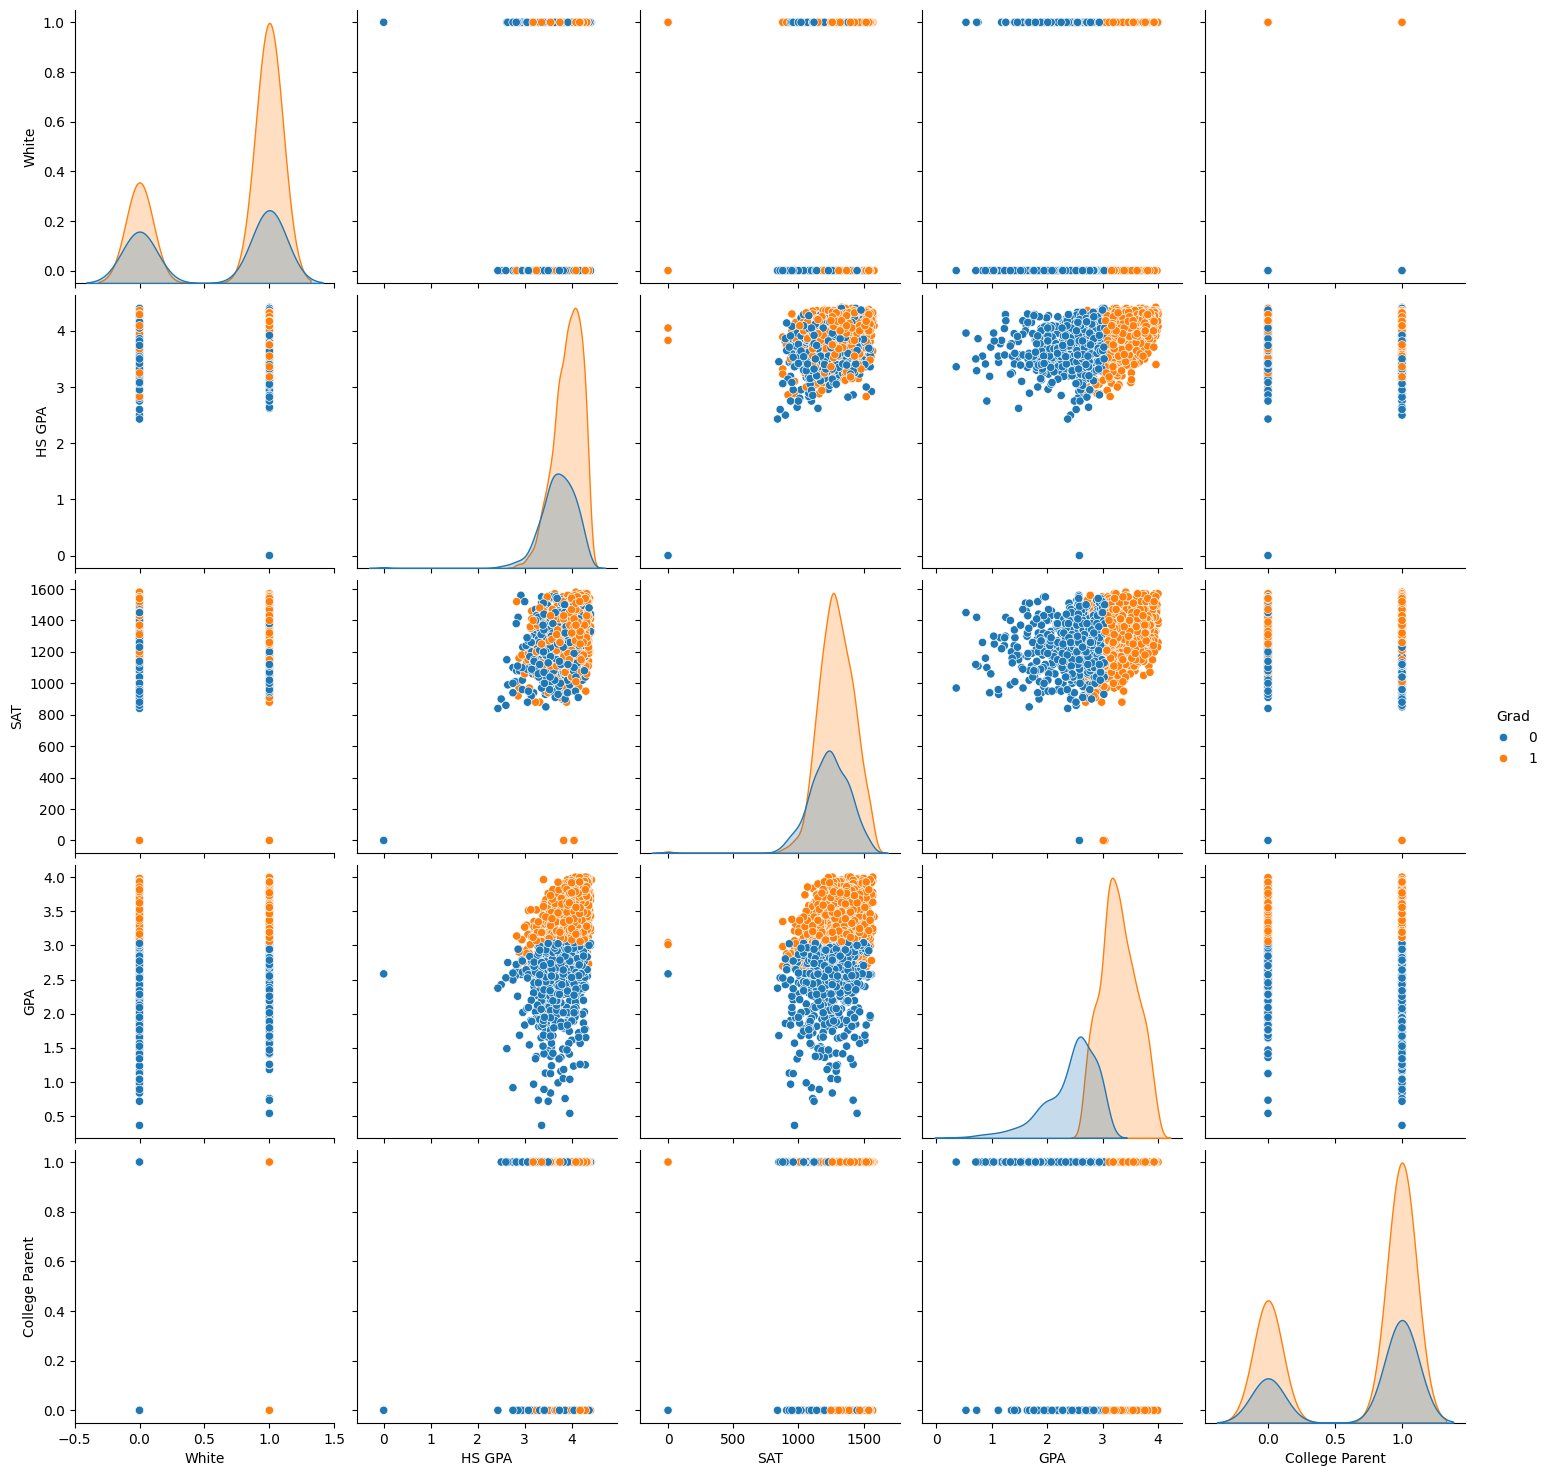

In [ ]:
sns.pairplot(XDB,hue='Grad',size=3, vars=['White','HS GPA','SAT','GPA','College Parent'])

XD2=np.array(XDB.iloc[:,[0,1,2,3,4,5,]])
YD2=np.array(XDB.iloc[:,6])

1.2 Mapa de Calor - Correlación

<Axes: >

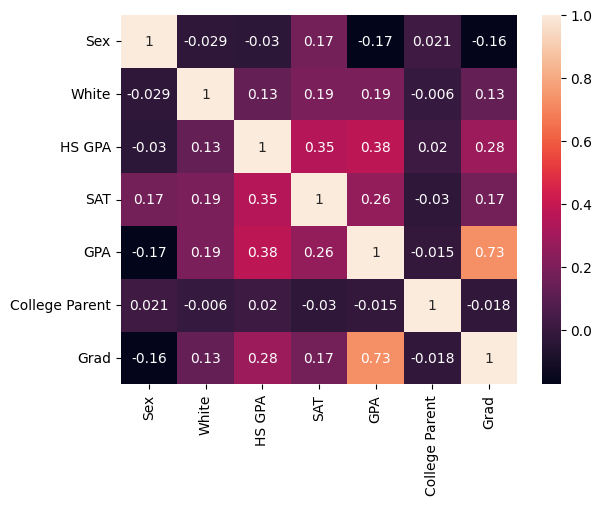

In [ ]:
corr=XDB.corr()
sns.heatmap(corr,annot=True)

2. Creación del Modelo

In [ ]:
np.random.seed(42)

mkm=KMeans(n_clusters=5,init='random',random_state=42)
mkm.fit(XD,YD)
labels=mkm.labels_
XDP1=np.array([[1,4,1260,1.9,1]])
XDP2=np.array([[1,2.91,1090,2.719,1]])
XDP3=np.array([[0,3.58,1210,3.319,1]])

print('Cluster de la Persona 1: ',mkm.predict(XDP1))
print('Cluster de la Persona 2: ',mkm.predict(XDP2))
print('Cluster de la Persona 3: ',mkm.predict(XDP3))

Cluster de la Persona 1:  [3]
Cluster de la Persona 2:  [0]
Cluster de la Persona 3:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4. Gráfica con las variables de entrada con mayor correlación

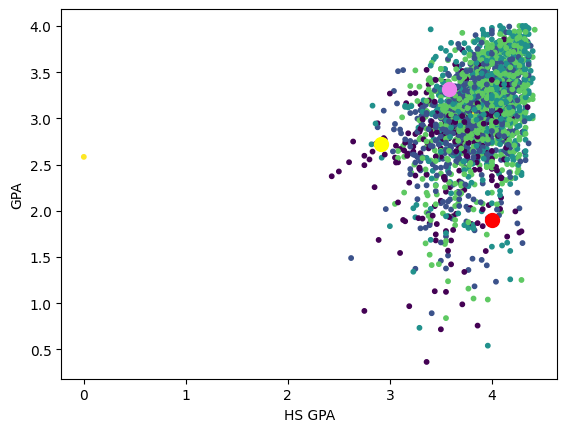

In [ ]:
plt.scatter(XD[:,1],XD[:,3],c=labels,s=10,cmap='viridis')
plt.scatter(XDP1[:,1],XDP1[:,3],marker='o',s=100,facecolors='red')
plt.scatter(XDP2[:,1],XDP2[:,3],marker='o',s=100,facecolors='yellow')
plt.scatter(XDP3[:,1],XDP3[:,3],marker='o',s=100,facecolors='violet')
plt.xlabel('HS GPA');plt.ylabel('GPA')
plt.show()

5. Conformación de cada cluster

In [ ]:
c00=len(np.where((labels==0)&(YD2==0))[0])
c01=len(np.where((labels==0)&(YD2==1))[0])
print('El porcentaje de personas que no se gradúan en el cluster 0 es:',c00/(c00+c01)*100)
print('El porcentaje de personas que se gradúan en el cluster 0 es:',c01/(c00+c01)*100)
print('La cantidad de personas que no se gradúan en el cluster 0:',c00)
print('La cantidad de personas que se gradúan en el cluster 0:',c01)

c10=len(np.where((labels==1)&(YD2==0))[0])
c11=len(np.where((labels==1)&(YD2==1))[0])
print('El porcentaje de personas que no se gradúan en el cluster 1 es:',c10/(c10+c11)*100)
print('El porcentaje de personas que se gradúan en el cluster 1 es:',c11/(c10+c11)*100)
print('La cantidad de personas que no se gradúan en el cluster 1:',c10)
print('La cantidad de personas que se gradúan en el cluster 1:',c11)

c20=len(np.where((labels==2)&(YD2==0))[0])
c21=len(np.where((labels==2)&(YD2==1))[0])
print('El porcentaje de personas que no se gradúan en el cluster 2 es:',c20/(c20+c21)*100)
print('El porcentaje de personas que se gradúan en el cluster 2 es:',c21/(c20+c21)*100)
print('La cantidad de personas que no se gradúan en el cluster 2:',c20)
print('La cantidad de personas que se gradúan en el cluster 2:',c21)

c30=len(np.where((labels==3)&(YD2==0))[0])
c31=len(np.where((labels==3)&(YD2==1))[0])
print('El porcentaje de personas que no se gradúan en el cluster 3 es:',c30/(c30+c31)*100)
print('El porcentaje de personas que se gradúan en el cluster 3 es:',c31/(c30+c31)*100)
print('La cantidad de personas que no se gradúan en el cluster 3:',c30)
print('La cantidad de personas que se gradúan en el cluster 3:',c31)

c40=len(np.where((labels==4)&(YD2==0))[0])
c41=len(np.where((labels==4)&(YD2==1))[0])
print('El porcentaje de personas que no se gradúan en el cluster 4 es:',c40/(c40+c41)*100)
print('El porcentaje de personas que se gradúan en el cluster 4 es:',c41/(c40+c41)*100)
print('La cantidad de personas que no se gradúan en el cluster 4:',c40)
print('La cantidad de personas que se gradúan en el cluster 4:',c41)

El porcentaje de personas que no se gradúan en el cluster 0 es: 51.301115241635685
El porcentaje de personas que se gradúan en el cluster 0 es: 48.698884758364315
La cantidad de personas que no se gradúan en el cluster 0: 138
La cantidad de personas que se gradúan en el cluster 0: 131
El porcentaje de personas que no se gradúan en el cluster 1 es: 33.03249097472924
El porcentaje de personas que se gradúan en el cluster 1 es: 66.96750902527076
La cantidad de personas que no se gradúan en el cluster 1: 183
La cantidad de personas que se gradúan en el cluster 1: 371
El porcentaje de personas que no se gradúan en el cluster 2 es: 24.18032786885246
El porcentaje de personas que se gradúan en el cluster 2 es: 75.81967213114754
La cantidad de personas que no se gradúan en el cluster 2: 118
La cantidad de personas que se gradúan en el cluster 2: 370
El porcentaje de personas que no se gradúan en el cluster 3 es: 25.65597667638484
El porcentaje de personas que se gradúan en el cluster 3 es: 74.

6. Caracterización de los cluster

In [ ]:
clusters=mkm.cluster_centers_
print('Características sociodemográficas de cada cluster:',clusters)

maxhs= np.argmax(clusters[:,1])
maxgpa= np.argmax(clusters[:,3])

print('El cluster con mayor HS GPA es:', maxhs)
print('El cluster con mayor GPA es:', maxgpa)

Características sociodemográficas de cada cluster: [[   0.46    3.64 1053.12    2.71    0.73]
 [   0.64    3.8  1190.72    2.97    0.69]
 [   0.77    3.96 1446.82    3.16    0.66]
 [   0.73    3.9  1304.69    3.09    0.69]
 [   0.67    2.63    0.      2.88    0.67]]
El cluster con mayor HS GPA es: 2
El cluster con mayor GPA es: 2


# Análisis

El análisis de los modelos Naive Bayes, Árbol de Decisión y K-Means, basados en las variables "Sex", "White", "HS GPA", "SAT", "GPA" y "College parent", se enfoca en predecir la variable de salida "Grad". A continuación, se detalla el rendimiento de cada uno de los modelos y su comportamiento frente a los índices de exactitud, sensibilidad y especificidad.


**1. Correlaciones entre Variables**:

*GPA y Grad*: Con un coeficiente de correlación de 0.73, esta es la relación más fuerte entre la variable de salida "Grad" y las variables de entrada. Esto indica que un mayor promedio general en la universidad (GPA) está altamente relacionado con la probabilidad de graduación.

*HS GPA y Grad:* Aunque con una correlación más baja, HS GPA (calificación en la preparatoria) tiene un coeficiente de 0.28 con "Grad", lo que sugiere una leve influencia en la predicción de la graduación.

*GPA y HS GPA:* Entre las variables de entrada, "GPA" y "HS GPA" presentan un coeficiente de 0.38, mostrando una correlación moderada entre el desempeño en la preparatoria y el promedio en la universidad.

**2. Modelo Naive Bayes**

El grupo 1 obtuvo las mejores calificaciones en GPA y HS GPA

Exactitud: El modelo mostró una exactitud del 87.6%, lo que indica que predijo correctamente la mayoría de los casos de graduación y no graduación.

Sensibilidad: Con un valor de 93.1%, el modelo tuvo un buen desempeño en la identificación de los casos positivos (estudiantes que se gradúan).

Especificidad: La especificidad fue de 75.3%, lo que indica que el modelo es menos efectivo al identificar a los no graduados (falsos positivos).

Categorías de Pronóstico: Según Naive Bayes, los individuos 1 y 2 no se gradúan, mientras que el individuo 3 sí lo hace.

**3. Modelo Árbol de Decisión**

Exactitud: El Árbol de Decisión superó a Naive Bayes en exactitud, alcanzando el 90.3%, lo que refleja una mayor capacidad para predecir correctamente la graduación.

Sensibilidad: La sensibilidad fue casi perfecta, con un 99.9%, lo que indica que el modelo predice con mucha precisión a los estudiantes que se gradúan.

Especificidad: A pesar de su alta sensibilidad, la especificidad fue de 68.5%, lo que indica una menor capacidad para identificar a los no graduados, algo menor que Naive Bayes.

Reglas de Negocio:

Primer nodo puro: [413, 0] – GPA ≤ 2.653

Segundo nodo puro: [0, 1075] – GPA > 2.653, GPA > 3.041

Tercer nodo puro: [3, 0] – GPA > 2.653, GPA ≤ 3.041, HS GPA > 4.365

Individuos de Pronóstico:

Persona 1 (Nodo[413,0]): GPA ≤ 2.653 (No se gradúa)

Persona 2 (Nodo[194,307]): GPA > 2.653, GPA ≥ 3.041, HS GPA ≤ 4.365, GPA ≤ 3.037

Persona 3 (Nodo[0,1075]): GPA > 2.653, GPA > 3.041 (Se gradúa)


**4. Modelo K-Means**
No se puede realizar la matriz de confusión para el modelo KMeans

Calificaciones en Preparatoria (HS GPA) y Universidad (GPA):

El clúster 2 tuvo la mayor calificación promedio en la preparatoria (HS GPA).
El clúster 2 tuvo la mayor calificación promedio (GPA).

El clúster 3 tuvo el mayor porcentaje de graduados, con un 74.34% de graduación (510 personas).
Individuos de Pronóstico:

Persona 1: Clúster 3

Persona 2: Clúster 0

Persona 3: Clúster 1


**Conclusión General**

En general, el Árbol de Decisión fue el modelo con mejor rendimiento, mostrando una alta exactitud y sensibilidad, aunque su capacidad para identificar correctamente a los no graduados fue menor. Naive Bayes, aunque ligeramente menos preciso, tuvo una mejor especificidad que el Árbol de Decisión